In [1]:
%cd ..

/home/zarizky/projects/neural-autoregressive-object-co-occurrence


In [2]:
import pickle
from copy import deepcopy

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import pygraphviz as pgv
from IPython.display import Image
from tqdm.auto import tqdm

import einet_addons
import utils
from EinsumNetwork import Graph

In [3]:
df_train = pd.read_csv("dataset/coco2017-cooccurences-train.csv").iloc[:, 8:]
df_train.columns = [
    col.split("-")[0].replace("[", "").replace("]", "").upper().replace(" ", "\n")
    for col in df_train.columns
]

df_valid = pd.read_csv("dataset/coco2017-cooccurences-valid.csv").iloc[:, 8:]
df_valid.columns = df_train.columns

In [4]:
BIN_G, BN = utils.bin_g.load(
    "outputs/backup/coco2017_bin_20-Jun-2023.mat", df_train, add_bracket=False
)

In [5]:
RG = einet_addons.structure.bin_g_region_graph(BIN_G, with_aggregate=False)

with open("outputs/bin_g_rg.gpickle", "wb") as f:
    pickle.dump(RG, f, pickle.HIGHEST_PROTOCOL)

In [6]:
len(Graph.get_roots(RG))

35

In [9]:
leaves = Graph.get_leaves(RG)
mappings = {leaf: df_train.columns[leaf.scope[0]] for leaf in leaves}

RG_cpy = nx.relabel_nodes(RG, mappings)
products = Graph.get_products(RG_cpy)
sums = Graph.get_sums(RG_cpy)
leaves = Graph.get_leaves(RG_cpy)

nx.set_node_attributes(RG_cpy, {p: "×" for p in products}, "label")
nx.set_node_attributes(RG_cpy, {s: "+" for s in sums}, "label")

nx.set_node_attributes(RG_cpy, {p: "circle" for p in products}, "shape")
nx.set_node_attributes(RG_cpy, {s: "circle" for s in sums}, "shape")
nx.set_node_attributes(RG_cpy, {l: "box" for l in leaves}, "shape")

roots = [node for node in RG_cpy.nodes if len(list(RG_cpy.predecessors(node))) <= 0]
forest = [einet_addons.forest.gather_nodes(RG_cpy, root) for root in roots]

pgv = nx.nx_agraph.to_agraph(RG_cpy)

pgv.graph_attr["start"] = 0


independent_nodes = []
for i, tree in enumerate(forest, 1):
    # print([node for node in tree if node in df_train.columns])
    if len(tree) > 1:
        pgv.add_subgraph(tree, name=f"t{i}", rankdir="TB")
    else:
        independent_nodes.extend(tree)
pgv_idp = pgv.add_subgraph(independent_nodes, name=f"t{i+1}", rank="sink")

pgv.graph_attr["clusterrank"] = "local"
pgv.graph_attr["dpi"] = 512
pgv.graph_attr["overlap"] = "false"
pgv.graph_attr["margin"] = "0"
pgv.node_attr["shape"] = "box"

pgv.layout("dot")
pgv.draw("outputs/einet/bin_g_rg.pdf")
pgv.draw("outputs/einet/bin_g_rg.png")

display(Image("outputs/einet/bin_g_rg.png"))

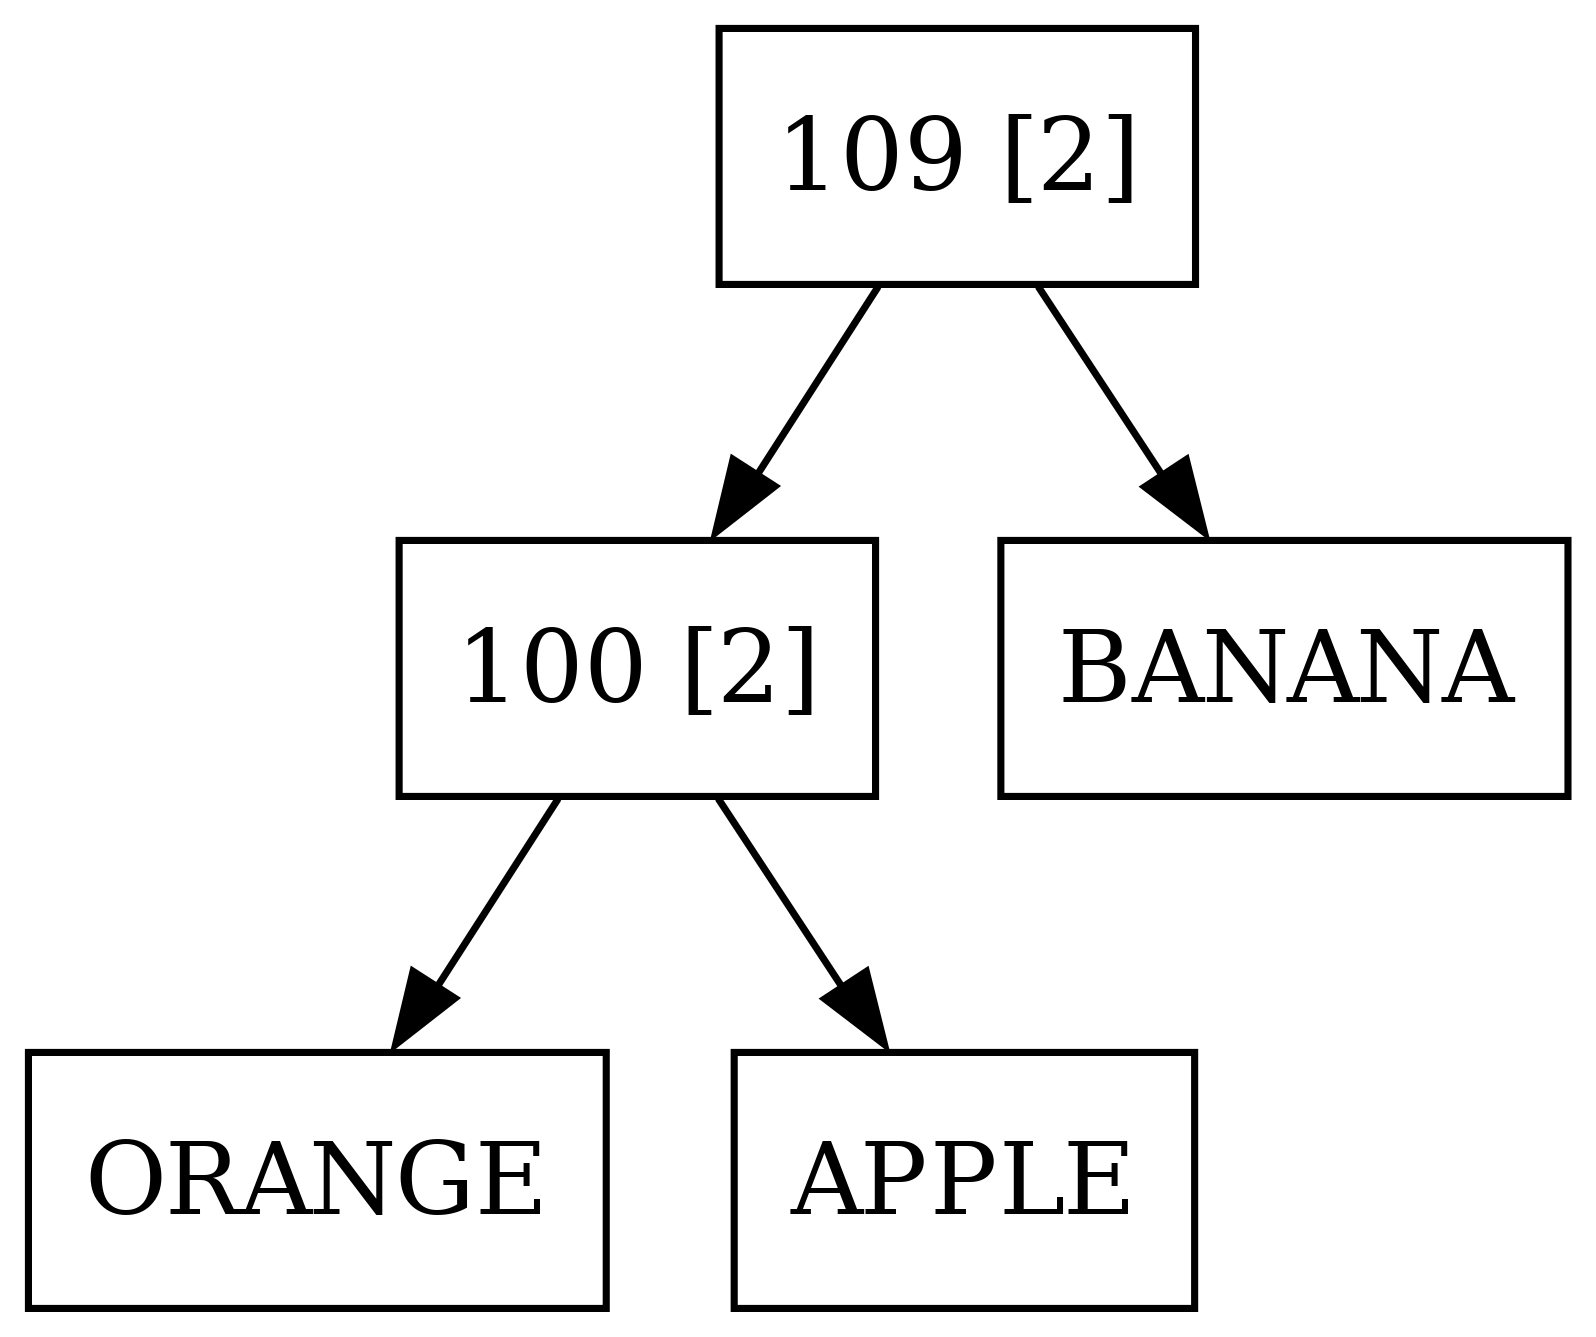

In [32]:
df_train = pd.read_csv("dataset/coco2017-cooccurences-train.csv").iloc[:, 8:]
df_train.columns = [
    col.split("-")[0].replace("[", "").replace("]", "").upper().replace(" ", "\n")
    for col in df_train.columns
]

df_valid = pd.read_csv("dataset/coco2017-cooccurences-valid.csv").iloc[:, 8:]
df_valid.columns = df_train.columns

BIN_G, BN = utils.bin_g.load(
    "outputs/backup/coco2017_bin_20-Jun-2023.mat", df_train, add_bracket=True
)

subgraphs = [
    BIN_G.subgraph(einet_addons.forest.gather_nodes(BIN_G, root))
    for root in Graph.get_roots(BIN_G)
]
sample_subgraph = subgraphs[-6]

leaves = Graph.get_leaves(sample_subgraph)
#mappings = {leaf: df_train.columns[leaf.scope[0]] for leaf in leaves}

RG_cpy = nx.relabel_nodes(sample_subgraph, mappings)
products = Graph.get_products(RG_cpy)
sums = Graph.get_sums(RG_cpy)
leaves = Graph.get_leaves(RG_cpy)

nx.set_node_attributes(RG_cpy, {l: "box" for l in RG_cpy.nodes}, "shape")

roots = [node for node in RG_cpy.nodes if len(list(RG_cpy.predecessors(node))) <= 0]
forest = [einet_addons.forest.gather_nodes(RG_cpy, root) for root in roots]

pgv = nx.nx_agraph.to_agraph(RG_cpy)

pgv.graph_attr["start"] = 0


independent_nodes = []
for i, tree in enumerate(forest, 1):
    # print([node for node in tree if node in df_train.columns])
    if len(tree) > 1:
        pgv.add_subgraph(tree, name=f"t{i}", rankdir="TB")
    else:
        independent_nodes.extend(tree)
pgv_idp = pgv.add_subgraph(independent_nodes, name=f"t{i+1}", rank="sink")

pgv.graph_attr["clusterrank"] = "local"
pgv.graph_attr["dpi"] = 512
pgv.graph_attr["overlap"] = "false"
pgv.graph_attr["margin"] = "0"
pgv.node_attr["shape"] = "box"

pgv.layout("dot")
pgv.draw("outputs/bin_g_tree/bin_g_sample.pdf")
pgv.draw("outputs/bin_g_tree/bin_g_sample.png")

display(Image("outputs/bin_g_tree/bin_g_sample.png"))

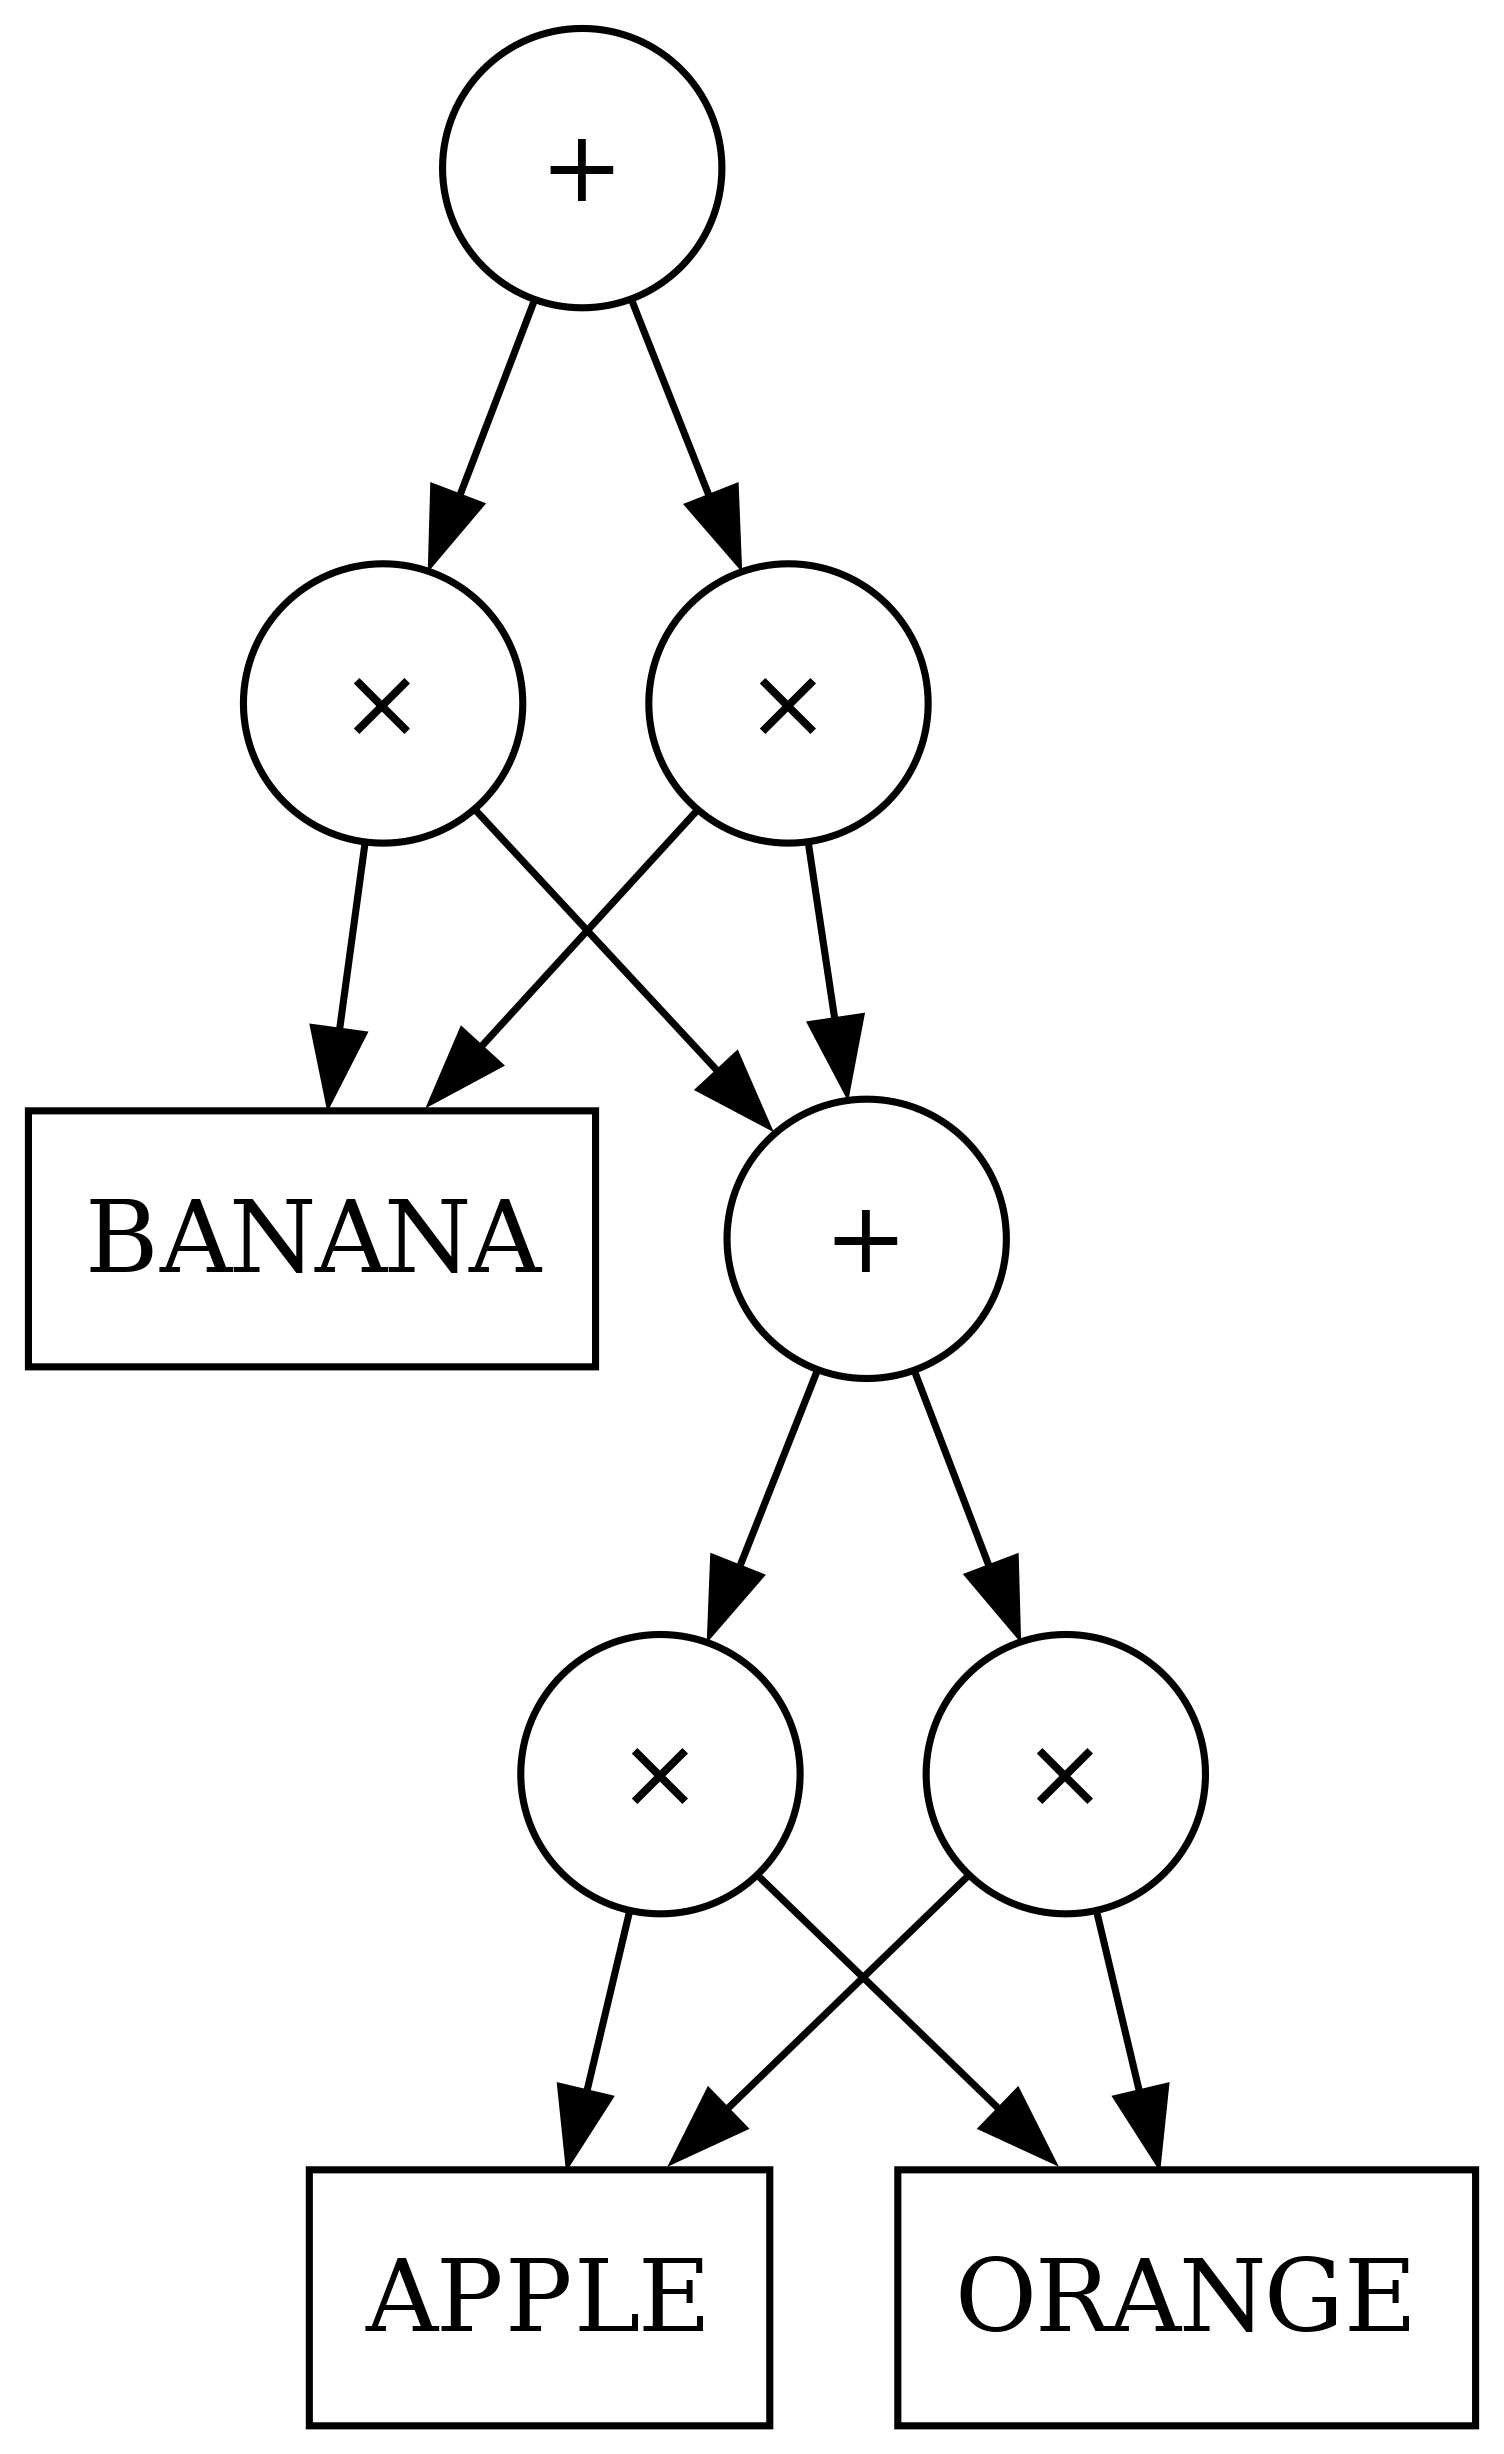

In [24]:
subgraphs = [
    RG.subgraph(einet_addons.forest.gather_nodes(RG, root))
    for root in Graph.get_roots(RG)
]
sample_subgraph = subgraphs[-6]

leaves = Graph.get_leaves(sample_subgraph)
mappings = {leaf: df_train.columns[leaf.scope[0]] for leaf in leaves}

RG_cpy = nx.relabel_nodes(sample_subgraph, mappings)
products = Graph.get_products(RG_cpy)
sums = Graph.get_sums(RG_cpy)
leaves = Graph.get_leaves(RG_cpy)

nx.set_node_attributes(RG_cpy, {p: "×" for p in products}, "label")
nx.set_node_attributes(RG_cpy, {s: "+" for s in sums}, "label")

nx.set_node_attributes(RG_cpy, {p: "circle" for p in products}, "shape")
nx.set_node_attributes(RG_cpy, {s: "circle" for s in sums}, "shape")
nx.set_node_attributes(RG_cpy, {l: "box" for l in leaves}, "shape")

roots = [node for node in RG_cpy.nodes if len(list(RG_cpy.predecessors(node))) <= 0]
forest = [einet_addons.forest.gather_nodes(RG_cpy, root) for root in roots]

pgv = nx.nx_agraph.to_agraph(RG_cpy)

pgv.graph_attr["start"] = 0


independent_nodes = []
for i, tree in enumerate(forest, 1):
    # print([node for node in tree if node in df_train.columns])
    if len(tree) > 1:
        pgv.add_subgraph(tree, name=f"t{i}", rankdir="TB")
    else:
        independent_nodes.extend(tree)
pgv_idp = pgv.add_subgraph(independent_nodes, name=f"t{i+1}", rank="sink")

pgv.graph_attr["clusterrank"] = "local"
pgv.graph_attr["dpi"] = 512
pgv.graph_attr["overlap"] = "false"
pgv.graph_attr["margin"] = "0"
pgv.node_attr["shape"] = "box"

pgv.layout("dot")
pgv.draw("outputs/einet/bin_g_rg_sample.pdf")
pgv.draw("outputs/einet/bin_g_rg_sample.png")

display(Image("outputs/einet/bin_g_rg_sample.png"))

In [8]:
RG = einet_addons.structure.bin_g_region_graph(
    BIN_G, with_aggregate=False, with_repetition=False
)

with open("outputs/bin_g_rg_no_repetition.gpickle", "wb") as f:
    pickle.dump(RG, f, pickle.HIGHEST_PROTOCOL)

In [9]:
leaves = Graph.get_leaves(RG)
mappings = {leaf: df_train.columns[leaf.scope[0]] for leaf in leaves}

RG_cpy = nx.relabel_nodes(RG, mappings)
products = Graph.get_products(RG_cpy)
sums = Graph.get_sums(RG_cpy)
leaves = Graph.get_leaves(RG_cpy)

nx.set_node_attributes(RG_cpy, {p: "×" for p in products}, "label")
nx.set_node_attributes(RG_cpy, {s: "+" for s in sums}, "label")

nx.set_node_attributes(RG_cpy, {p: "circle" for p in products}, "shape")
nx.set_node_attributes(RG_cpy, {s: "circle" for s in sums}, "shape")
nx.set_node_attributes(RG_cpy, {l: "box" for l in leaves}, "shape")

roots = [node for node in RG_cpy.nodes if len(list(RG_cpy.predecessors(node))) <= 0]
forest = [einet_addons.forest.gather_nodes(RG_cpy, root) for root in roots]

pgv = nx.nx_agraph.to_agraph(RG_cpy)

pgv.graph_attr["start"] = 0


independent_nodes = []
for i, tree in enumerate(forest, 1):
    # print([node for node in tree if node in df_train.columns])
    if len(tree) > 1:
        pgv.add_subgraph(tree, name=f"t{i}", rankdir="TB")
    else:
        independent_nodes.extend(tree)
pgv_idp = pgv.add_subgraph(independent_nodes, name=f"t{i+1}", rank="sink")

pgv.graph_attr["clusterrank"] = "local"
# pgv.graph_attr["ratio"] = "0.5"
pgv.graph_attr["dpi"] = 512
pgv.graph_attr["overlap"] = "false"
pgv.graph_attr["margin"] = "0"
pgv.node_attr["shape"] = "box"

pgv.layout("dot")
pgv.draw("outputs/einet/bin_g_rg_no_repetition.pdf")
pgv.draw("outputs/einet/bin_g_rg_no_repetition.png")

display(Image("outputs/einet/bin_g_rg_no_repetition.png"))